### Задача 1
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

неупорядоченные веса:

ver_1 time is 0.002526998519897461 sec


<function matplotlib.pyplot.show(close=None, block=None)>

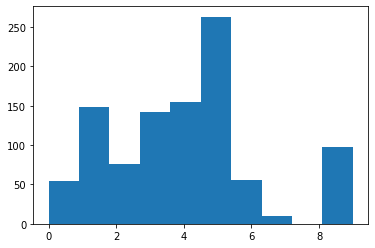

In [163]:
import numpy as np 
import matplotlib.pyplot as plt
import time
arr = np.arange(10) 
weights=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights=weights/weights.sum()
weights=weights.cumsum()
random_array=[]
t1=time.time()
random = np.random.rand(1000)
for i in range(1000):
    for j in range(10): #пробегаем от 0 до 9
        if random[i]<weights[j]:  #random i ищет i до 1 рандомно 
            random_array.append(j)
            break
t2=time.time()
print('ver_1 time is',t2-t1, 'sec') 
plt.hist(random_array)
plt.show





[5 4 1 3 9 2 0 6 7 8]
[0.26879044 0.15430562 0.14932802 0.11946242 0.09955202 0.08312593
 0.05973121 0.05525137 0.0099552  0.00049776]
ver_2 time is  0.003258228302001953 sec


<function matplotlib.pyplot.show(close=None, block=None)>

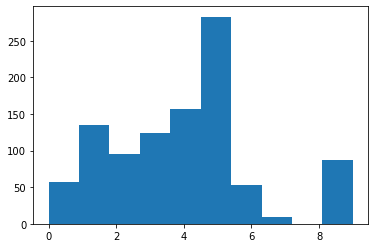

In [164]:
weights=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights=weights/weights.sum()
n=np.argsort(weights)[::-1]
print(n)
weights=np.sort(weights)[::-1]
print(weights)
weights=weights.cumsum()
arr_2=[]
t1=time.time()
random = np.random.rand(1000)
for i in range(1000):
    for j in range(10):
        if random[i]<weights[j]:
            arr_2.append(n[j])
            break
t2=time.time()
print('ver_2 time is ',t2-t1, 'sec')
plt.hist(arr_2)
plt.show

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача 2
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

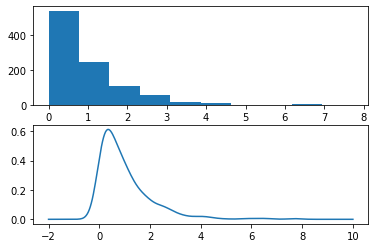

In [165]:

from scipy.stats import kde
a  = np.random.exponential(size = 1000)
density = kde.gaussian_kde(a)
x = np.linspace(-2,10,300)
y=density(x)
fig, ax = plt.subplots(2)
ax[0].hist(a)
ax[1].plot(x, y)
plt.show()



### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача 3
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

In [166]:
from scipy import stats
import numpy as np
import seaborn as sns
dist = stats.cauchy()
 #needs to be normalized!
plt.show()

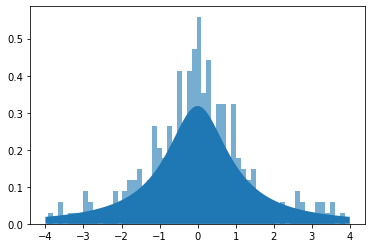

In [167]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x))
x1 = np.random.uniform(-4,4,1000)
y1 = np.random.uniform(0,0.35,1000)
random = x1[y1 < ((np.power(x1,2)+1)*np.pi)**(-1)]
plt.hist(random, bins=60,alpha=0.6, density = "True")
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача 4
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

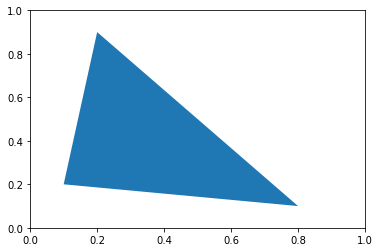

In [168]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

In [169]:
import random

def point_on_triangle(pt1, pt2, pt3):
    
    s, t = sorted([random.random(), random.random()])
    return (s * pt1[0] + (t-s)*pt2[0] + (1-t)*pt3[0],
            s * pt1[1] + (t-s)*pt2[1] + (1-t)*pt3[1])


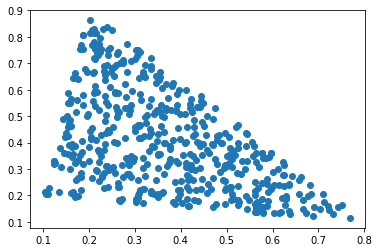

In [170]:
pt1 = (0.1, 0.2)
pt2 = (0.2, 0.9)
pt3 = (0.8, 0.1)
points = [point_on_triangle(pt1, pt2, pt3) for i in range(500)]
x, y = zip(*points)
plt.scatter(x, y)
plt.show()


### Задача 5
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

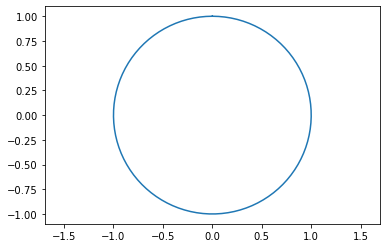

In [171]:
import math
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

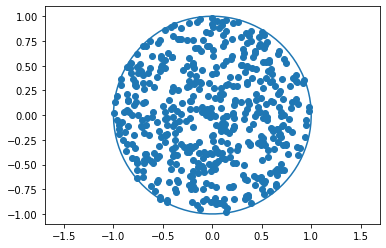

In [172]:
def random_circle():
  k = np.array([np.random.rand(),np.random.rand()])
  r = k[1]
  alpha = k[0]*2*math.pi
  k[0] = r**0.5 * math.cos(alpha)
  k[1] = r**0.5 * math.sin(alpha)
  return k
random = [random_circle() for i in range(500)]
random_x = [random[i][0] for i in range(500)]
random_y = [random[i][1] for i in range(500)]
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis("equal")
plt.scatter(random_x, random_y)

### Задача 6
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

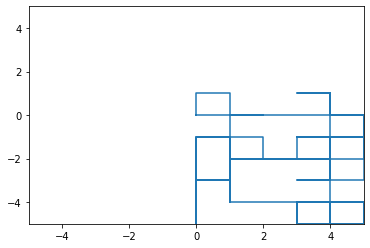

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import random
def randomWalkb(length_grid): # как я понимаю решетка длины n это решетка 10 на 10 
    steps = []
    x,y = 0,0
    walkx,walky = [x],[y]
    new = random.randint(1,4)
    if new == 1:
        x += 1
    elif new == 2:
         y += 1
    elif new ==3 :
            x += -1
    else :
            y += -1
    walkx.append(x)
    walky.append(y)
    while (x!=0) or (y!=0): # надо проверять,чтобы не было выхода за границу решетки, для этого 

        new = random.randint(1,4)
        if new == 1:
            if (x == 5): 
                x-=1
            else:
                x += 1
        elif new == 2:
            if (y == 5):
                y -= 1 
            else:
                y += 1
        elif new ==3 :
            if (x == -5):
                x += 1
            else: 
                x -= 1
        else :
            if (y == -5):
                y += 1
            else:
                y -= 1
        walkx.append(x)
        walky.append(y)
    return [walkx,walky]

walk = randomWalkb(100)

plt.plot(walk[0],walk[1],'', label= 'Random walk')
plt.axis([-5,5,-5,5])

plt.show()

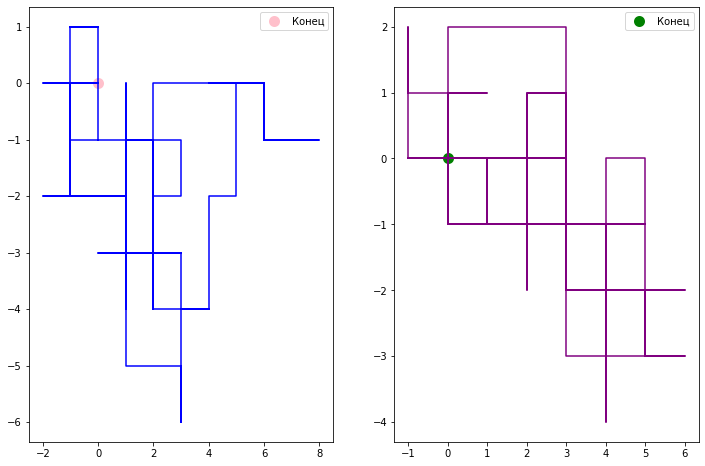

In [174]:
def r_walk(n):
    x = np.ones(n)
    y = np.ones(n)
    x[np.random.choice(range(n), n//2, replace = False)]=-1
    y[np.random.choice(range(n), n//2, replace = False)]=-1
    x=np.cumsum(x)
    y = np.cumsum(y)
    x_n = (x+y)/2 #нам требуется симметричное блуждание 
    y_n = (x-y)/2
    return x_n,y_n

x1,y1 = r_walk(100)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(x1,y1, color='blue')
plt.scatter(x1[99],y1[99],color='pink',lw=5, label='Конец')
plt.legend()
x2,y2 = r_walk(100)
plt.subplot(1,2,2)
plt.plot(x2,y2,color='purple')
plt.scatter(x1[99],y1[99],color='green',lw=5, label='Конец')
plt.legend()
plt.show()


## Random normal generator

### Задача 7
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

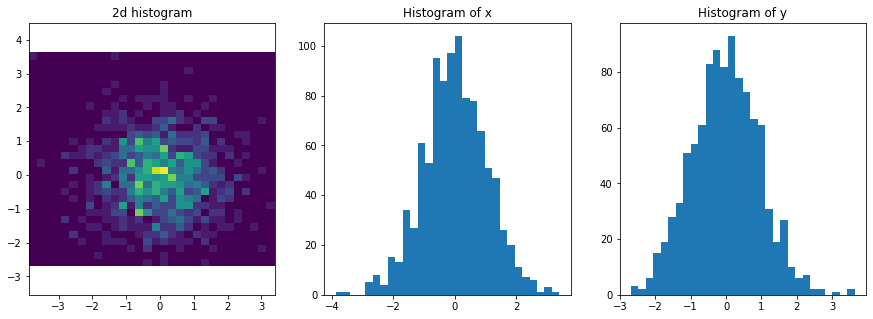

In [175]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

[-0.36508965 -0.32884468  0.20275564 ...  0.27244965 -0.38923872
  0.43231322]
[-0.36508965 -0.32884468  0.20275564 ...  0.27244965 -0.38923872
  0.43231322]


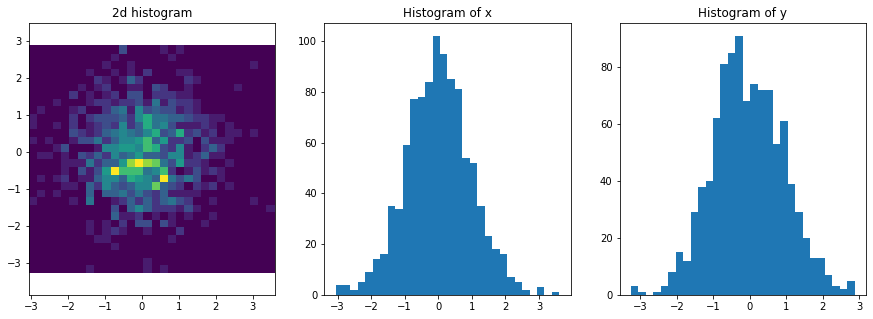

In [176]:
n = 2000
x1, y1 = np.random.rand(2, n)*2-1
print(x1)
r = x1*x1+y1*y1
x1=x1[r<1]
print(x1
     )
y1=y1[r<1]
r = r[r<1] 
x = x1*np.sqrt((-2*np.log(r))/r)
y = y1*np.sqrt((-2*np.log(r))/r)
x=x[:1000]
y=y[:1000]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

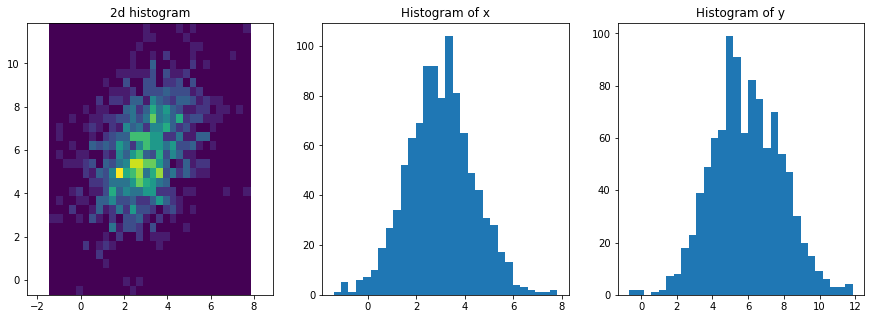

In [177]:
a = np.array([3, 6])
K = np.array([[2, 1],[1, 4]])
det = np.linalg.det(K)
tr = np.trace(K)
K_1_2 = ( K + np.sqrt(det) * np.diag([1, 1])) / np.sqrt((tr+2*np.sqrt(det)))
x2 = a[0] + K_1_2[0, 0] * x + K_1_2[0, 1] * y
y2 = a[1] + K_1_2[1, 0] * x + K_1_2[1, 1] * y
x2=x2[:1000]
y2=y2[:1000]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x2, y2, bins=30)
ax[0].axis('equal')
ax[1].hist(x2, bins=30)
ax[2].hist(y2, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()